In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
#Import datasets
metadata = pd.read_csv('hmp2_metadata.csv')
clusters = pd.read_csv('cluster analysis.csv')

C:\Users\Tim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#Select only the rows with the metagenomics or metatranscriptomics datatype
metadata1 = metadata[metadata['data_type'] == 'metagenomics']
metadata2 = metadata[metadata['data_type'] == 'metatranscriptomics']
metadata1.shape, metadata2.shape

((1638, 490), (835, 490))

In [337]:
#Select the Age at diagnosis and sex metadata metrics
metadatac = metadata1.append(metadata2)
metadatac = metadatac.reset_index()
metavdataf1 = metadatac[['External ID','data_type', 'Age at diagnosis', 'sex']]

In [338]:
#Select only the name and group label (group2) columns
clusters = clusters[['group2','name']]

Text(0.5, 0, 'Cluster')

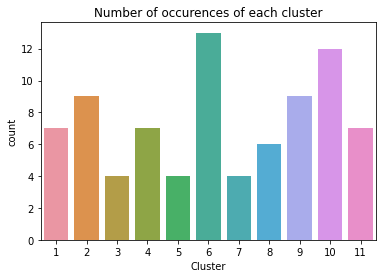

In [339]:
#Determine the largest clusters
import seaborn as sns
fig = plt.figure()
ax = sns.countplot(x="group2", data=clusters)
ax.set_title('Number of occurences of each cluster')
ax.set_xlabel('Cluster')

In [134]:
import os
fig.savefig('cluster size.png', bbox_inches='tight', dpi=150)

In [ ]:
##Cluster characterization

In [340]:
#Select clusters with the highest number of samples
clust6 = clusters.loc[clusters['group2'] == 6]
clust10 = clusters.loc[clusters['group2'] == 10]
clust9 = clusters.loc[clusters['group2'] == 9]
clust2 = clusters.loc[clusters['group2'] == 2]

clust6 = np.array(clust6.iloc[:,1])
clust10 = np.array(clust10.iloc[:,1])
clust9 = np.array(clust9.iloc[:,1])
clust2 = np.array(clust2.iloc[:,1])

In [ ]:
##The sample names from the metadata have "_P" added making comparing difficult. 
##First, the last two characters of all "external ID" strings are removed

In [341]:
#Select the external ID (sample) column
metdataID = [metadataf1.iloc[:,0]]
metdataID = np.array(metdataID)
metdataID = list(metdataID)

#Remove the last two characters in each string
metaID = []
for i in range(len(metdataID)):
    x = list(map(lambda j: j[:-2], metdataID[i]))
    metaID.append(x)
metaID = np.transpose(metaID)
metaID1 = pd.DataFrame(metaID)

#Before adding the processed external ID column back, the indices must be identical
metadataf1 = metadataf1.reset_index()
metadataf1 = metadataf1.drop('index', axis=1)

#Add the processed External ID column back under the "sample" name to avoid confusion
metadataf1['sample'] = metaID1

In [351]:
#Select only the samples mapping the the samples in cluster 6,10,2 and 9
metaID6 = metadataf1[metadataf1.iloc[:,4].isin(clust6)]
metaID10 = metadataf1[metadataf1.iloc[:,4].isin(clust10)]
metaID2 = metadataf1[metadataf1.iloc[:,4].isin(clust2)]
metaID9 = metadataf1[metadataf1.iloc[:,4].isin(clust9)]

#This results in duplicates for each sample as the samples and measurements are duplicated for both the
#metagenomics and metatranscriptomics datatype.
metaID6 = metaID6.drop_duplicates(subset=['sample'])
metaID10 = metaID10.drop_duplicates(subset=['sample'])
metaID2 = metaID2.drop_duplicates(subset=['sample'])
metaID9 = metaID9.drop_duplicates(subset=['sample'])

,External ID,data_type,Age at diagnosis,sex,sample
21,CSM5FZ46_P,metagenomics,47.0,Female,CSM5FZ46
22,CSM5MCVJ_P,metagenomics,47.0,Female,CSM5MCVJ
77,CSM5MCTZ_P,metagenomics,24.0,Male,CSM5MCTZ
78,CSM5MCUG_P,metagenomics,24.0,Male,CSM5MCUG
417,ESM5ME9D_P,metagenomics,8.0,Female,ESM5ME9D
430,ESM5ME9H_P,metagenomics,NaN,Female,ESM5ME9H
982,CSM5LLGB_P,metagenomics,30.0,Male,CSM5LLGB
992,MSM5LLHR_P,metagenomics,26.0,Male,MSM5LLHR
993,MSM5LLIE_P,metagenomics,26.0,Male,MSM5LLIE


In [115]:
#Determine average age 
A1 = round(metaID6.iloc[:,2].mean(),1)
A2 = round(metaID10.iloc[:,2].mean(),1)
A3 = round(metaID2.iloc[:,2].mean(),1)
A4 = round(metaID9.iloc[:,2].mean(),1)
mean_age = [A1,A2,A3,A4]
mean_age

[33.2, 21.3, 26.6, 29.0]

In [350]:
#Determine sex ration
male = 'Male'
female = 'Female'
S1 = round(metaID6.iloc[:,3].str.count(male).sum() / metaID6.iloc[:,3].str.count(female).sum(),2)
S2 = round(metaID10.iloc[:,3].str.count(male).sum() / metaID10.iloc[:,3].str.count(female).sum(),2)
S3 = round(metaID2.iloc[:,3].str.count(male).sum() / metaID2.iloc[:,3].str.count(female).sum(),2)
S4 = round(metaID9.iloc[:,3].str.count(male).sum() / metaID9.iloc[:,3].str.count(female).sum(),2)
sex_ratio = [S1,S2,S3,S4]
sex_ratio

[0.08, 0.71, 0.29, 1.25]

In [105]:
#Determine number of samples per cluster
C1 = metaID6.iloc[:,3].count()
C2 = metaID10.iloc[:,3].count()
C3 = metaID2.iloc[:,3].count()
C4 = metaID9.iloc[:,3].count()
Clust_count = [C1,C2,C3,C4]
Clust_count

[13, 12, 9, 9]

In [346]:
#Combine all results in a table
char = pd.DataFrame(mean_age)
char['female/male ratio'] = pd.DataFrame(sex_ratio)
char['cluster size'] = pd.DataFrame(Clust_count)
char.columns = ['Average age of diagnosis', 'Female/male ratio', 'Cluster size']
char.index = ['cluster 6', 'cluster 10', 'cluster 2', 'cluster 9']
char

,Average age of diagnosis,Female/male ratio,Cluster size
cluster 6,33.2,0.92,13
cluster 10,21.3,0.54,12
cluster 2,26.6,0.54,9
cluster 9,29.0,0.31,9


In [129]:
#Compare values with average sex ratio and age of diagnosis for all samples
avg_sex_ratio = round(metavdataf1.iloc[:,3].str.count(substr).sum() / metavdataf1.iloc[:,3].count(),2)
avg_age = round(metavdataf1.iloc[:,2].mean(),1)
avg_sex_ratio, avg_age

(0.51, 21.5)